2. Tự tạo dataset, thực hiện denoise ảnh cifar-10

In [71]:
(x_train, _), (x_test, y_test) = cifar10.load_data()

In [64]:
print(x_train.shape)

(50000, 32, 32, 3)


In [72]:
x_val = x_train[40000:50000, ]
x_train = x_train[:40000, ]
print(x_train.shape)

(40000, 32, 32, 3)


In [73]:
def norm(x):
    x = x.astype('float32')/255.
    return x

x_train = norm(x_train)
x_test = norm(x_test)
x_val = norm(x_val)

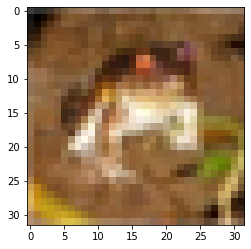

In [75]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [76]:
def add_noise(x, noise_factor=0.05):
    x = x + np.random.randn(*x.shape) * noise_factor
    x = x.clip(0., 1.)
    return x
    
X_train_noisy = add_noise(x_train)
X_val_noisy = add_noise(x_val)
X_test_noisy  = add_noise(x_test)

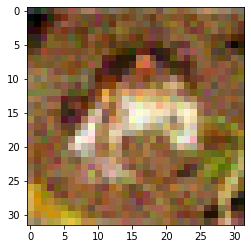

In [89]:
plt.imshow(X_train_noisy[0])

In [83]:
inputs = Input(shape=(32, 32, 3))
x = Conv2D(16, 3, strides=2, activation='relu', padding='same')(inputs)
x = Conv2D(16, 3, strides=2, activation='relu', padding='same')(x)
x = Conv2D(8, 3, strides=2, activation='sigmoid', padding='same')(x)

# decoder
x = Conv2DTranspose(16, 3, strides=2, padding='same', activation='relu')(x)
x = Conv2DTranspose(16, 3, strides=2, padding='same', activation='relu')(x)
decoder = Conv2DTranspose(3, 3, padding='same', strides=2, activation='sigmoid')(x)

# autoencoder
model_dn = Model(inputs, decoder)
model_dn.compile(loss='binary_crossentropy', optimizer='adam')

In [84]:
model_dn.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 16)        448       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 16)          2320      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 8)           1160      
_________________________________________________________________
conv2d_transpose_6 (Conv2DTr (None, 8, 8, 16)          1168      
_________________________________________________________________
conv2d_transpose_7 (Conv2DTr (None, 16, 16, 16)        2320      
_________________________________________________________________
conv2d_transpose_8 (Conv2DTr (None, 32, 32, 3)         435 

In [95]:
model_dn.fit(X_train_noisy, x_train,
                    batch_size=256, epochs=20,
                    validation_data=(X_val_noisy, x_val))

Epoch 1/20
157/157 [==============================] - 20s 130ms/step - loss: 0.5773 - val_loss: 0.5778
Epoch 2/20
157/157 [==============================] - 19s 124ms/step - loss: 0.5767 - val_loss: 0.5775
Epoch 3/20
157/157 [==============================] - 19s 124ms/step - loss: 0.5765 - val_loss: 0.5774
Epoch 4/20
157/157 [==============================] - 20s 129ms/step - loss: 0.5763 - val_loss: 0.5769
Epoch 5/20
157/157 [==============================] - 20s 126ms/step - loss: 0.5760 - val_loss: 0.5767
Epoch 6/20
157/157 [==============================] - 20s 127ms/step - loss: 0.5758 - val_loss: 0.5768
Epoch 7/20
157/157 [==============================] - 20s 127ms/step - loss: 0.5754 - val_loss: 0.5762
Epoch 8/20
157/157 [==============================] - 20s 127ms/step - loss: 0.5755 - val_loss: 0.5761
Epoch 9/20
157/157 [==============================] - 20s 125ms/step - loss: 0.5751 - val_loss: 0.5770
Epoch 10/20
157/157 [==============================] - 21s 132ms/step - l

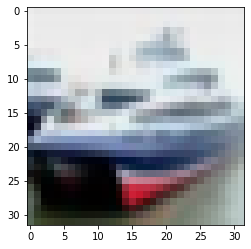

In [99]:
plt.imshow(x_test[1])

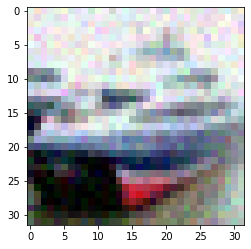

In [96]:
plt.imshow(X_test_noisy[1])

In [97]:
x_test_denoise = model_dn.predict(X_test_noisy)

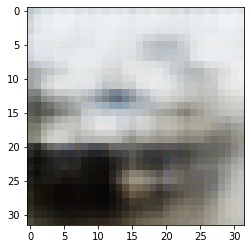

In [98]:
plt.imshow(x_test_denoise[1])

3. Giảm chiều dữ liệu cifar-10 về 2d, visualize và so sánh giữa PCA, neural network AE và convolutional AE.

In [79]:
from keras.datasets import cifar10, mnist
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2DTranspose, Conv2D, Input, MaxPooling2D, Flatten, UpSampling2D

In [3]:
# cifar10 3072 -> 2 dim:
# neural network AE
node = 1024
inputs = Input(shape=(node, ))
# x = Dense(256, activation='relu')(inputs)
# x = Dense(32, activation='relu')(x)
encoder = Dense(2, activation='relu')(inputs)

# x = Dense(32, activation='relu')(encoder)
# x = Dense(256, activation='relu')(x)
decoder = Dense(node, activation='sigmoid')(encoder)

model_nn_AE = Model(inputs, decoder)
model_nn_AE.compile(loss='binary_crossentropy', 
                    optimizer='adam')
model_nn_AE.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1024)]            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 2050      
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              3072      
Total params: 5,122
Trainable params: 5,122
Non-trainable params: 0
_________________________________________________________________


In [2]:
# data
(x_train, _), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 5s 0us/step


In [4]:
x_train = tf.image.rgb_to_grayscale(x_train)
x_test = tf.image.rgb_to_grayscale(x_test)

In [5]:
x_train = tf.cast(x_train,tf.float32)/255.
x_test = tf.cast(x_test, tf.float32)/255.

In [6]:
print(x_train.shape)

(50000, 32, 32, 1)


In [ ]:
print(x_train[0])
print(x_train.shape)

In [6]:
x_train = np.array(x_train).reshape(-1, node)
x_test = np.array(x_test).reshape(-1, node)

In [7]:
print(x_train[0])

[0.23921569 0.1764706  0.1882353  ... 0.7372549  0.4862745  0.3882353 ]


In [8]:
x_val = x_train[40000:50000, :]
x_train = x_train[0:40000, ]
print(x_train[0])

[0.23921569 0.1764706  0.1882353  ... 0.7372549  0.4862745  0.3882353 ]


In [9]:
print(x_train.shape, x_val.shape, x_test.shape)

(40000, 1024) (10000, 1024) (10000, 1024)


In [10]:
Epoch = 20
model_nn_AE.fit(x_train, x_train, epochs=Epoch, 
                batch_size=256, validation_data=(x_val, x_val))

Epoch 1/20
157/157 [==============================] - 2s 6ms/step - loss: 0.6804 - val_loss: 0.6666
Epoch 2/20
157/157 [==============================] - 1s 5ms/step - loss: 0.6640 - val_loss: 0.6614
Epoch 3/20
157/157 [==============================] - 1s 5ms/step - loss: 0.6600 - val_loss: 0.6581
Epoch 4/20
157/157 [==============================] - 1s 5ms/step - loss: 0.6572 - val_loss: 0.6558
Epoch 5/20
157/157 [==============================] - 1s 5ms/step - loss: 0.6550 - val_loss: 0.6540
Epoch 6/20
157/157 [==============================] - 1s 5ms/step - loss: 0.6532 - val_loss: 0.6521
Epoch 7/20
157/157 [==============================] - 1s 5ms/step - loss: 0.6513 - val_loss: 0.6503
Epoch 8/20
157/157 [==============================] - 1s 5ms/step - loss: 0.6497 - val_loss: 0.6494
Epoch 9/20
157/157 [==============================] - 1s 5ms/step - loss: 0.6483 - val_loss: 0.6473
Epoch 10/20
157/157 [==============================] - 1s 6ms/step - loss: 0.6468 - val_loss: 0.6460

In [11]:
model_encoder_nn = Model(inputs, encoder)

In [137]:
model_encoder_nn.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 1024)]            0         
_________________________________________________________________
dense_42 (Dense)             (None, 2)                 2050      
Total params: 2,050
Trainable params: 2,050
Non-trainable params: 0
_________________________________________________________________


In [12]:
print(x_test.shape)
print(x_test[0])

(10000, 1024)
[0.4627451  0.4627451  0.48235294 ... 0.25882354 0.2901961  0.22745098]


In [13]:
test = model_nn_AE.predict(np.expand_dims(x_test[0], 0))
print(test)

[[0.4506726  0.44885337 0.44926053 ... 0.40408325 0.4028855  0.40206897]]


In [14]:
x_pred = model_encoder_nn.predict(x_test)
print(x_pred.shape)

(10000, 2)


In [15]:
print(x_pred[10])

[ 8.816498 16.716318]


In [23]:
import matplotlib.pyplot as plt

In [17]:
print(y_test.shape)

(10000, 1)


In [18]:
x_0 = x_pred[y_test[0:, 0]==0]
x_1 = x_pred[y_test[:, 0]==1]
x_2 = x_pred[y_test[:, 0]==2]
x_3 = x_pred[y_test[:, 0]==3]
x_4 = x_pred[y_test[:, 0]==4]
print(x_0.shape, x_1.shape, x_2.shape, x_3.shape)

(1000, 2) (1000, 2) (1000, 2) (1000, 2)


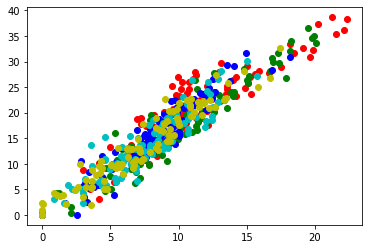

In [19]:
plt.scatter(x_0[:100, 0], x_0[:100, 1], c='r')
plt.scatter(x_1[:100, 0], x_1[:100, 1], c='g')
plt.scatter(x_2[:100, 0], x_2[:100, 1], c='b')
plt.scatter(x_3[:100, 0], x_3[:100, 1], c='c')
plt.scatter(x_4[:100, 0], x_4[:100, 1], c='y')

In [80]:
# Convolution AE
# encoder
inputs = Input(shape=(32, 32, 3))
x = Conv2D(16, 3, strides=2, activation='relu', padding='same')(inputs)
x = Conv2D(16, 3, strides=2, activation='relu', padding='same')(x)
x = Conv2D(8, 3, strides=2, activation='sigmoid', padding='same')(x)
# bottle_neck
x = Flatten()(x)
encoder = Dense(2, activation='relu')(x)

# decoder
x = Dense(x.shape[-1], activation='relu')(encoder)
x = tf.keras.layers.Reshape((4, 4, -1))(x)
x = Conv2DTranspose(16, 3, strides=2, padding='same', activation='relu')(x)
x = Conv2DTranspose(16, 3, strides=2, padding='same', activation='relu')(x)
decoder = Conv2DTranspose(3, 3, padding='same', strides=2, activation='sigmoid')(x)

# autoencoder
autoencoder = Model(inputs, decoder)
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

In [81]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 16)        448       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 16)          2320      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 8)           1160      
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 258       
_________________________________________________________________
dense_3 (Dense)              (None, 128)               384 

In [8]:
# data
(x_train, _), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [9]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_val = train_test_split(x_train, test_size=10000)

In [11]:
print(x_train.shape, x_val.shape, x_test.shape)

(40000, 32, 32, 3) (10000, 32, 32, 3) (10000, 32, 32, 3)


In [16]:
autoencoder.fit(x_train, x_train,
              epochs=25, batch_size=256,
              validation_data=(x_val, x_val))

Epoch 1/25
157/157 [==============================] - 4s 20ms/step - loss: 0.6804 - val_loss: 0.6648
Epoch 2/25
157/157 [==============================] - 3s 17ms/step - loss: 0.6561 - val_loss: 0.6515
Epoch 3/25
157/157 [==============================] - 3s 16ms/step - loss: 0.6494 - val_loss: 0.6475
Epoch 4/25
157/157 [==============================] - 3s 17ms/step - loss: 0.6462 - val_loss: 0.6451
Epoch 5/25
157/157 [==============================] - 3s 17ms/step - loss: 0.6439 - val_loss: 0.6429
Epoch 6/25
157/157 [==============================] - 3s 17ms/step - loss: 0.6423 - val_loss: 0.6415
Epoch 7/25
157/157 [==============================] - 3s 17ms/step - loss: 0.6411 - val_loss: 0.6405
Epoch 8/25
157/157 [==============================] - 3s 17ms/step - loss: 0.6402 - val_loss: 0.6396
Epoch 9/25
157/157 [==============================] - 3s 17ms/step - loss: 0.6394 - val_loss: 0.6390
Epoch 10/25
157/157 [==============================] - 3s 17ms/step - loss: 0.6388 - val_lo

In [17]:
model_cnn_AE = Model(inputs, encoder)
model_cnn_AE.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 16)        448       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 16)          2320      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 8)           1160      
_________________________________________________________________
flatten_3 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 258       
Total params: 4,186
Trainable params: 4,186
Non-trainable params: 0
_________________________________________________________

In [18]:
x_pred = model_cnn_AE.predict(x_test)
print(x_pred.shape)

(10000, 2)


In [19]:
print(x_pred[0])

[3.5639193 2.022832 ]


In [21]:
x_0 = x_pred[y_test[:, 0]==0]
x_1 = x_pred[y_test[:, 0]==1]
x_2 = x_pred[y_test[:, 0]==2]
x_3 = x_pred[y_test[:, 0]==3]
x_4 = x_pred[y_test[:, 0]==4]
print(x_0.shape, x_1.shape, x_2.shape, x_3.shape)

(1000, 2) (1000, 2) (1000, 2) (1000, 2)


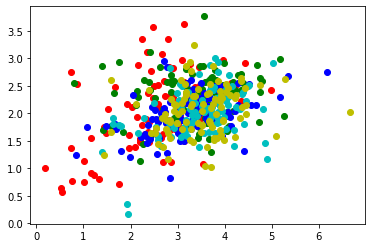

In [24]:
plt.scatter(x_0[:100, 0], x_0[:100, 1], c='r')
plt.scatter(x_1[:100, 0], x_1[:100, 1], c='g')
plt.scatter(x_2[:100, 0], x_2[:100, 1], c='b')
plt.scatter(x_3[:100, 0], x_3[:100, 1], c='c')
plt.scatter(x_4[:100, 0], x_4[:100, 1], c='y')

In [25]:
# PCA
from sklearn.decomposition import PCA

In [29]:
x = x_test.reshape(x_test.shape[0], -1)
pca = PCA(n_components=2)
y = pca.fit_transform(x)
print(y)

[[ -3.6944602    0.87166345]
 [  9.688773    -9.6900015 ]
 [  4.423445    -8.88711   ]
 ...
 [-15.420832     2.5345204 ]
 [ -6.107582     1.9473994 ]
 [ -1.9328625   -1.8537053 ]]


In [30]:
print(y.shape)

(10000, 2)


In [31]:
x_0 = y[y_test[:, 0]==0]
x_1 = y[y_test[:, 0]==1]
x_2 = y[y_test[:, 0]==2]
x_3 = y[y_test[:, 0]==3]
x_4 = y[y_test[:, 0]==4]

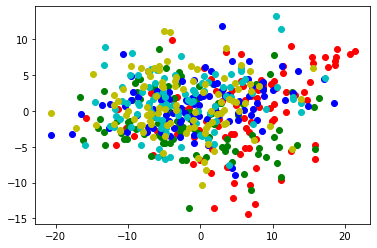

In [32]:
plt.scatter(x_0[:100, 0], x_0[:100, 1], c='r')
plt.scatter(x_1[:100, 0], x_1[:100, 1], c='g')
plt.scatter(x_2[:100, 0], x_2[:100, 1], c='b')
plt.scatter(x_3[:100, 0], x_3[:100, 1], c='c')
plt.scatter(x_4[:100, 0], x_4[:100, 1], c='y')